### Turbine efficiency variations depending on the parameters trend

In the following lines one parameter per time will be varied, while the other will be set to the mean value declared in the first lines of the script.

The Cholesky decomposition of fictive matrix R0 is:
[[1.        0.        0.        0.       ]
 [0.3       0.9539392 0.        0.       ]
 [0.        0.        1.        0.       ]
 [0.        0.        0.6       0.8      ]]
The fictive matrix is:
[[1.  0.3 0.  0. ]
 [0.3 1.  0.  0. ]
 [0.  0.  1.  0.6]
 [0.  0.  0.6 1. ]]


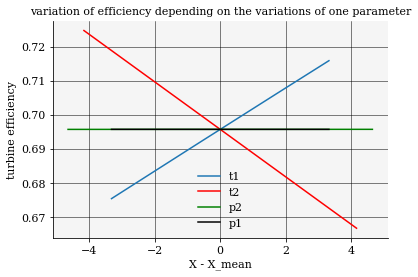

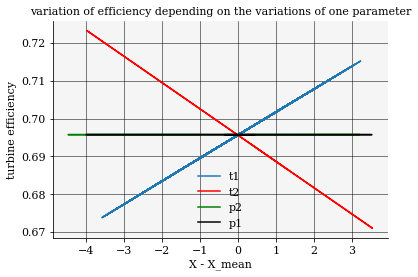

In [2]:
%matplotlib inline
""" the aim of the present script is to quantify the variation of the
    turbine efficincy when the values of the pressures are changed;
    a comparison with the analogue variations of tempetures is reported.
"""
import numpy as np
import matplotlib.pyplot as plt
from equadratures import *

T01 = 800.
T02 = 700.
P01 = 10*10**5
P02 = 5*10**5
gamma = 1.4

""" construction of the correlated points: 
    temperatures and pressures
"""

t1 = Parameter(distribution='truncated-gaussian', order=5, shape_parameter_A = T01, shape_parameter_B = 1., upper = T01*1.1, lower = T01*.9)
t2 = Parameter(distribution='truncated-gaussian', order=5, shape_parameter_A = T02, shape_parameter_B = 1., upper = T02*1.1, lower = T02*.9)
p1 = Parameter(distribution='truncated-gaussian', order=5, shape_parameter_A = P01, shape_parameter_B = 1., upper = P01*1.1, lower = P01*.9)
p2 = Parameter(distribution='truncated-gaussian', order=5, shape_parameter_A = P02, shape_parameter_B = 1., upper = P02*1.1, lower = P02*.9)

""" quadrature rule
"""
myBasis = Basis('Tensor grid')
normal = Parameter(order=5, distribution='gaussian', shape_parameter_A = 0., shape_parameter_B = 1.)
standardPoly = Polyint([normal, normal, normal, normal], myBasis)
quad = standardPoly.quadraturePoints

# definition of the correlation matrix
R = np.matrix([[1., .3, 0., 0.],
               [.3, 1., 0., 0.],
               [0., 0., 1., .6],
               [0., 0., .6, 1.]])

# definition of a nataf object
nataf_obj = Nataf([t1, t2, p1, p2], R) 

# correlated samples
corr_pnts = nataf_obj.getCorrelatedSamples(N=3000)
quad_pnts = nataf_obj.U2C(quad)

def efficiency(t1, t2, p1, p2, gamma):
    eta = np.zeros(len(t1))
    for i in range(len(t1)):
        eta[i] = (t1[i] -t2[i])/(t1[i]* (1- (p2[i]/p1[i])**((gamma-1.)/gamma)))
    return eta

#----------------------=---------------------------------------------------#
#   Quadrature points
#   the i th parameter changes its value, the other parameters are fixed
#   to the mean value specified in the first lines.
        
t1 = quad_pnts[:,0]
x1 = t1 - np.mean(t1)
t2 = T02* np.ones(len(t1))
p1 = P01* np.ones(len(t1))
p2 = P02* np.ones(len(t1))

first_case = efficiency(t1,t2,p1, p2, gamma)

t2 = quad_pnts[:,1]
x2 = t2 - np.mean(t2)
t1 = T01* np.ones(len(t2))
p1 = P01* np.ones(len(t2))
p2 = P02* np.ones(len(t2))

second_case = efficiency(t1,t2,p1, p2, gamma)

t1 = T01* np.ones(len(t2))
t2 = T02* np.ones(len(t1))
p1 = quad_pnts[:,2]
x3 = p1 - np.mean(p1)
p2 = P02* np.ones(len(t1))

third_case = efficiency(t1,t2,p1, p2, gamma)

t1 = T01* np.ones(len(t2))
t2 = T02* np.ones(len(t1))
p1 = P01* np.ones(len(t1))
p2 = quad_pnts[:,3]
x4 = p2 - np.mean(p2)

fourth_case = efficiency(t1, t2, p1, p2, gamma)

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(x1, first_case,label="t1")
plt.plot(x2, second_case, 'r',label="t2")
plt.plot(x4, fourth_case,'g' ,label="p2")
plt.plot(x3, third_case, 'k',label="p1")
plt.title('variation of efficiency depending on the variations of one parameter')
plt.xlabel('X - X_mean')
plt.ylabel('turbine efficiency')
plt.legend(loc='lower center')
#plt.yscale('log')
plt.show()

#////////////////////////////////////////////////////////////////////////////////
#----------------------=---------------------------------------------------#
#   Monte Carlo samples

t1 = corr_pnts[:,0]
x1 = t1 - np.mean(t1)
t2 = T02* np.ones(len(t1))
p1 = P01* np.ones(len(t1))
p2 = P02* np.ones(len(t1))

first_case = efficiency(t1,t2,p1, p2, gamma)

t2 = corr_pnts[:,1]
x2 = t2 - np.mean(t2)
t1 = T01* np.ones(len(t2))
p1 = P01* np.ones(len(t2))
p2 = P02* np.ones(len(t2))

second_case = efficiency(t1,t2,p1, p2, gamma)

t1 = T01* np.ones(len(t2))
t2 = T02* np.ones(len(t1))
p1 = corr_pnts[:,2]
x3 = p1 - np.mean(p1)
p2 = P02* np.ones(len(t1))

third_case = efficiency(t1,t2,p1, p2, gamma)

t1 = T01* np.ones(len(t2))
t2 = T02* np.ones(len(t1))
p1 = P01* np.ones(len(t1))
p2 = corr_pnts[:,3]
x4 = p2 - np.mean(p2)

fourth_case = efficiency(t1, t2, p1, p2, gamma)

plt.figure()
plt.grid(linewidth=0.5, color='k')
plt.plot(x1, first_case,label="t1")
plt.plot(x2, second_case, 'r',label="t2")
plt.plot(x4, fourth_case,'g' ,label="p2")
plt.plot(x3, third_case, 'k',label="p1")
plt.title('variation of efficiency depending on the variations of one parameter')
plt.xlabel('X - X_mean')
plt.ylabel('turbine efficiency')
plt.legend(loc='lower center')
#plt.yscale('log')
plt.show()

